**Loading the Dataset**

In [14]:
import pandas as pd

In [15]:
df=pd.read_csv('penguins_size.csv')

In [16]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [17]:
column_names = df.columns
print(column_names)

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


**Univariate Analysis**

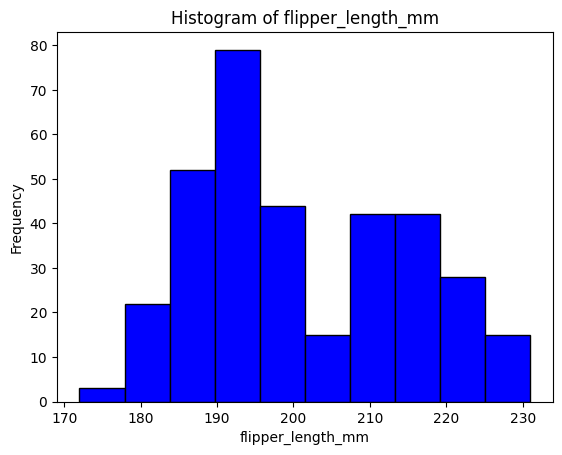

In [18]:
import matplotlib.pyplot as plt
plt.hist(df['flipper_length_mm'], bins=10, color='blue', edgecolor='black')
plt.xlabel('flipper_length_mm')
plt.ylabel('Frequency')
plt.title('Histogram of flipper_length_mm')
plt.show()

**Bi-Variate Analysis**

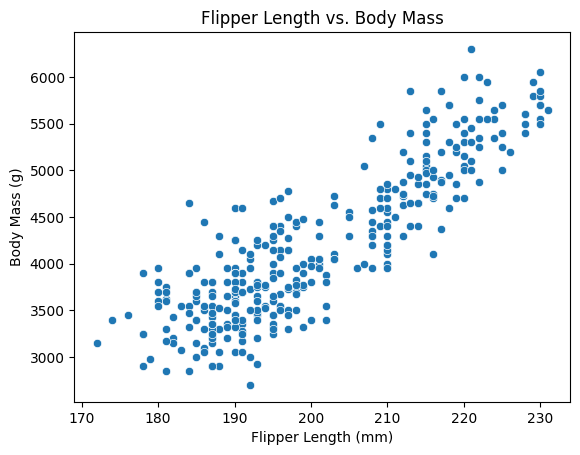

In [19]:
import seaborn as sns
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)
plt.title('Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

**Multi-Variate Analysis**

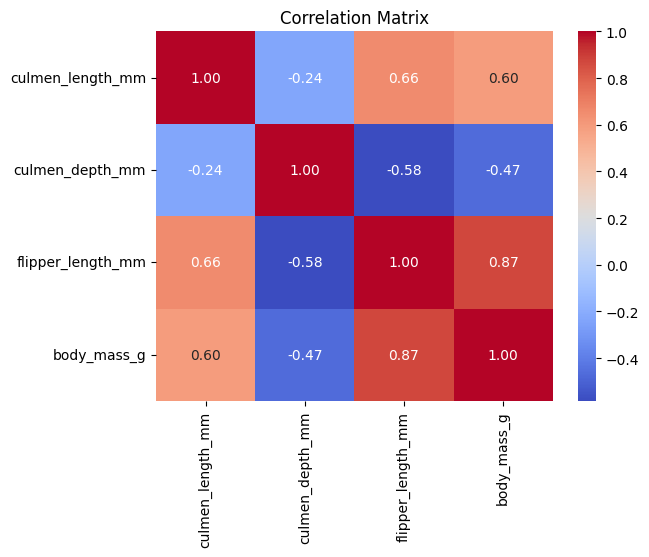

In [20]:
df = df.select_dtypes(include=['number'])
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Descriptive Statistics**

In [21]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Checking for Missing Values**

In [22]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [23]:
df.dropna(inplace=True)
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

**Find and Replace Outliers**

In [24]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows with all features within 3 standard deviations
print(df)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[342 rows x 4 columns]


**Checking for Categorical columns and perform encoding.**

In [25]:
categorical_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

In [26]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


In [27]:
encoded_df = pd.get_dummies(df, columns=categorical_columns)

In [28]:
encoded_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


**Splitting the data into dependent(y) and independent(x) variables**

In [29]:
y = df['body_mass_g']
x = df.drop('body_mass_g', axis=1)

In [30]:
y


0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64

In [31]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
338,47.2,13.7,214.0
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


**Scaling the features**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Splitting the data into training and testing**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3)

**Building the Model (Decision Tree)**

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model_1 = DecisionTreeClassifier()
model_1.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
pred_1 = model_1.predict(x_test)

**Measure the performance using Evaluation Metrics**

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
accuracy_1 = accuracy_score(y_test, pred_1)
precision_1 = precision_score(y_test, pred_1, average='weighted')
recall_1 = recall_score(y_test, pred_1, average='weighted')
f1_1 = f1_score(y_test, pred_1, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print("Accuracy of Decision Tree :",accuracy_1)
print("Precision of Decision Tree :",precision_1)
print("Recall of Decision Tree :",recall_1)
print("F1 score of Decision Tree :",f1_1)

Accuracy of Decision Tree : 0.05825242718446602
Precision of Decision Tree : 0.05275080906148868
Recall of Decision Tree : 0.05825242718446602
F1 score of Decision Tree : 0.04456061737615136
